In [ ]:
import pandas as pd

df = pd.read_csv("../data/raw/papersum.csv")

# print(df.head())



In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91919 entries, 0 to 91918
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   paperID                91919 non-null  object
 1   venue                  91919 non-null  object
 2   year                   91919 non-null  int64 
 3   openAccessPdf          91919 non-null  bool  
 4   url                    50039 non-null  object
 5   authors                91324 non-null  object
 6   referenceCount         91919 non-null  int64 
 7   title                  91919 non-null  object
 8   abstract               87276 non-null  object
 9   conclusion             39031 non-null  object
 10  Chatgpt Response       91919 non-null  object
 11  Key Takeaways          91919 non-null  object
 12  Importance             91919 non-null  object
 13  Model/Method Proposed  91919 non-null  object
 14  Performance            91919 non-null  object
 15  Effectiveness      

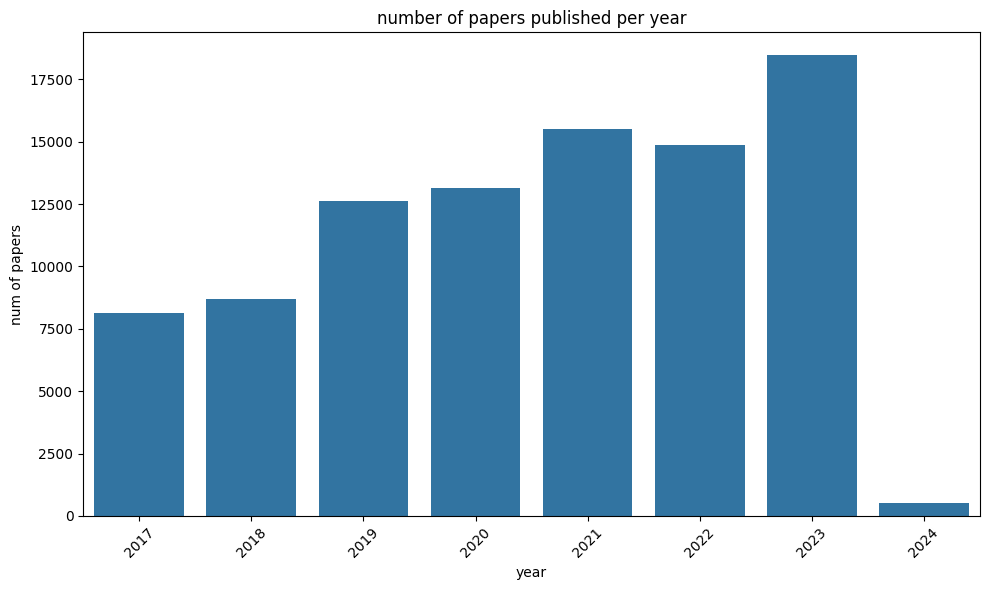

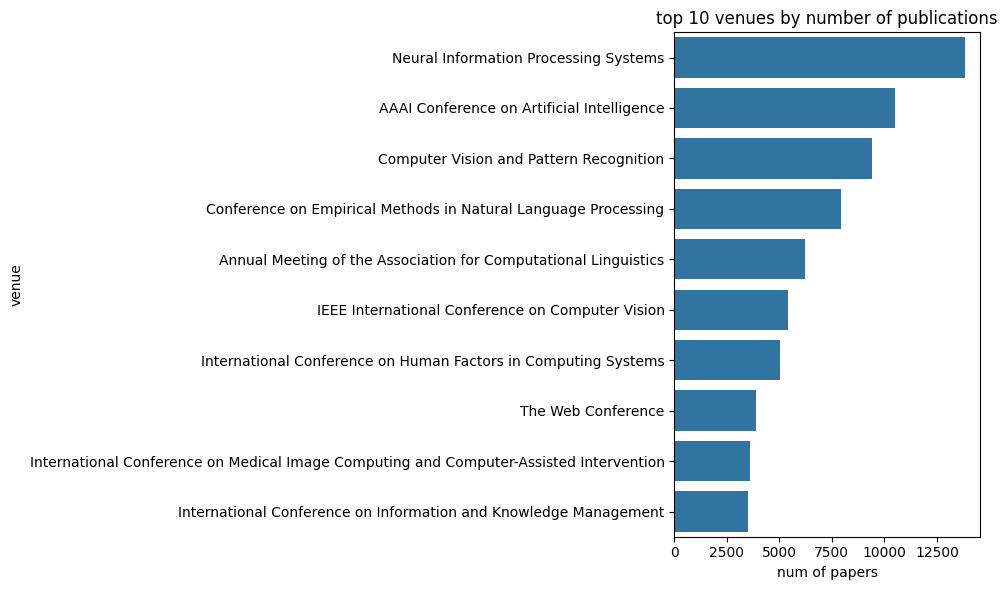

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# papers published by year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', order=sorted(df['year'].unique()))
plt.title('number of papers published per year')
plt.xlabel('year')
plt.ylabel('num of papers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# top 10 venues by publication count
top_venues = df['venue'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_venues.values, y=top_venues.index)
plt.title('top 10 venues by number of publications')
plt.xlabel('num of papers')
plt.ylabel('venue')
plt.tight_layout()
plt.show()

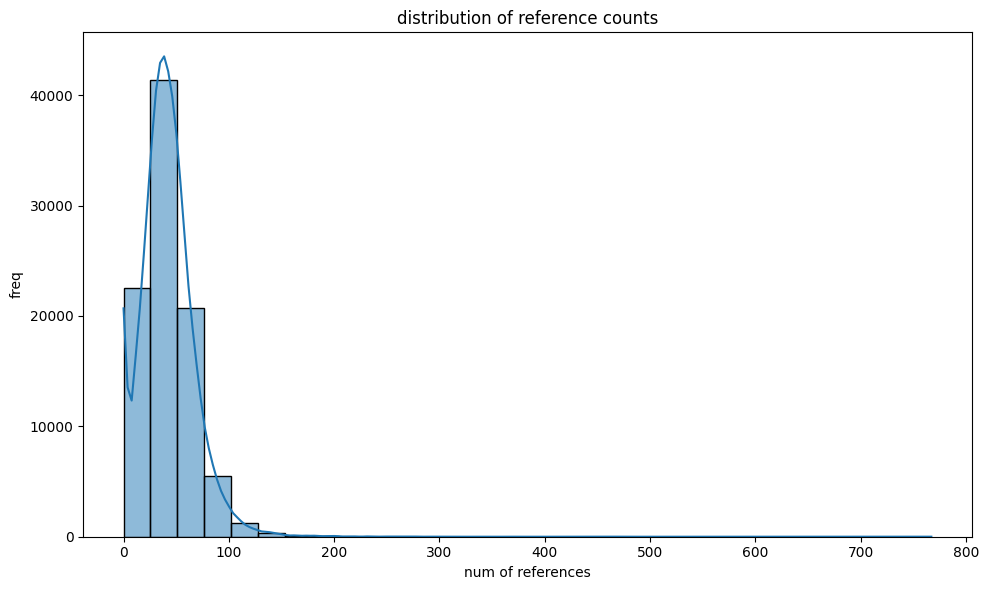

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['referenceCount'], bins=30, kde=True)
plt.title('distribution of reference counts')
plt.xlabel('num of references')
plt.ylabel('freq')
plt.tight_layout()
plt.show()

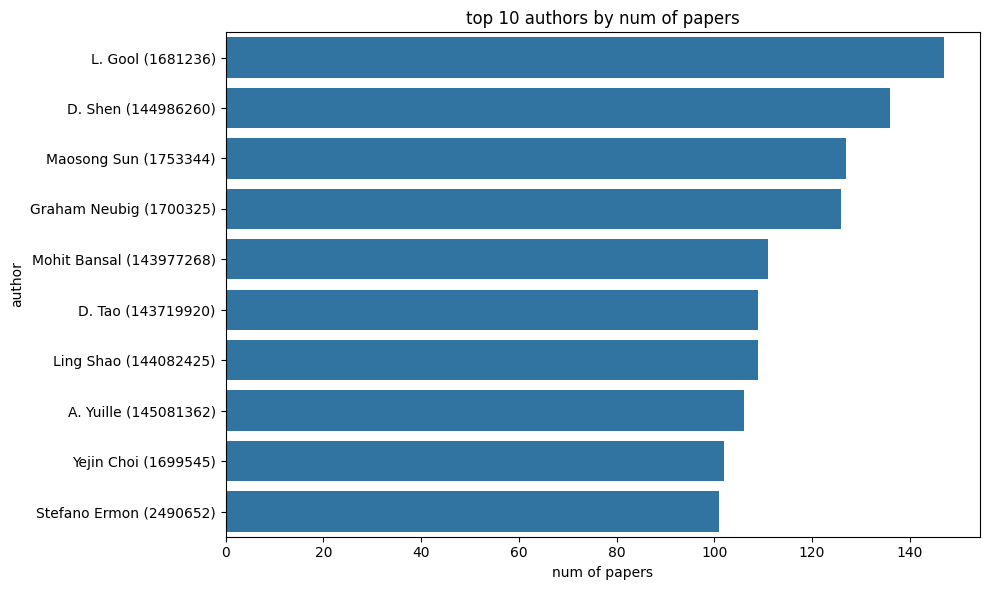

In [7]:
from collections import Counter

auth_series = df['authors'].dropna().apply(lambda x: x.split(','))
all_auth = [author.strip() for sublist in auth_series for author in sublist]
auth_counts = Counter(all_auth)

top_authors = auth_counts.most_common(10)
authors, counts = zip(*top_authors)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(authors))
plt.title('top 10 authors by num of papers')
plt.xlabel('num of papers')
plt.ylabel('author')
plt.tight_layout()
plt.show()


AttributeError: Rectangle.set() got an unexpected keyword argument 'on_bad_lines'

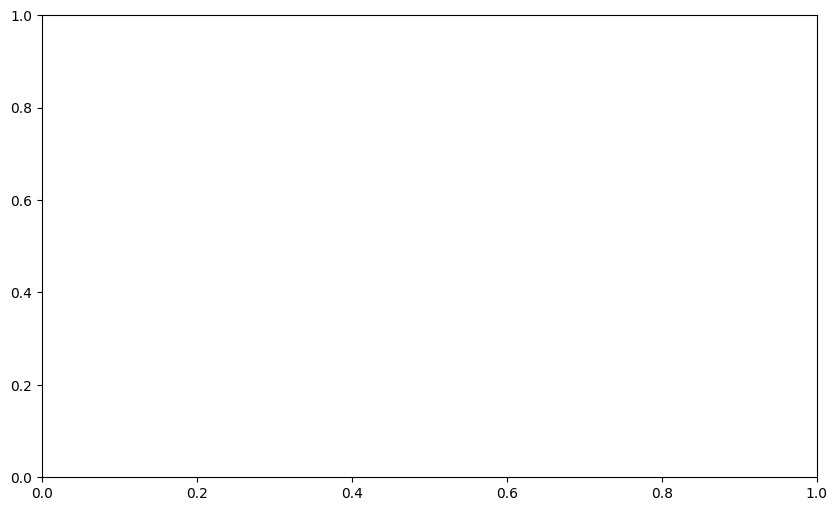

In [11]:
df['abstract_length'] = df['abstract'].astype(str).apply(len)
df['conclusion_length'] = df['conclusion'].astype(str).apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['abstract_length'], bins=30, kde=True, color='skyblue', label='Abstract', on_bad_lines='skip')
sns.histplot(df['conclusion'], bins=30, kde=True, color='forestgreen', label='Abstract', on_bad_lines='skip')
plt.title('distribution of abstract and conclusion lengths')
plt.xlabel('length (by char)')
plt.ylabel('freq')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter

keyword_series = df['combined_keywords'].dropna().apply(lambda x: x.split(','))
all_keywords = [keyword.strip().lower() for sublist in keyword_series for keyword in sublist]
